In [1]:
from rl4greencrab.envs.simple_env import SimpleEnv
from stable_baselines3 import PPO, TD3
from sb3_contrib import TQC, RecurrentPPO
from stable_baselines3.common.env_util import make_vec_env
from rl4greencrab.envs.green_crab_monthly_env_norm import greenCrabMonthEnvNormalized
from rl4greencrab import evaluate_agent, multiConstAction, simulator
import pandas as pd
import numpy as np
from rl4greencrab import plot_agent
import ray

INFO: Note: detected 128 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO: Note: NumExpr detected 128 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
INFO: NumExpr defaulting to 16 threads.
/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [2]:
from rl4greencrab import greenCrabMonthEnvSimple, greenCrabMonthEnvSimpleNormalized, greenCrabMonthEnvSize, greenCrabMonthEnvSizeNormalized

In [3]:
from rl4greencrab import greenCrabMonthEnvTwoAct, greenCrabMonthEnvTwoActNormalized

In [4]:
config = {
    "w_mort_scale" : 600,
    "growth_k": 0.70,
    'random_start':True,
    'var_penalty_const': 0
    # "curriculum": True
}

In [5]:
env = greenCrabMonthEnvTwoAct(config)
vec_env = make_vec_env(greenCrabMonthEnvTwoAct, n_envs=12, env_kwargs={'config':config})

In [7]:
act = np.array([0,0])
env.step(act)

({'crabs': array([0., 0.], dtype=float32), 'months': 3},
 -6.126776689500633e-05,
 False,
 False,
 {})

In [6]:
env = greenCrabMonthEnvTwoActNormalized(config)
vec_env = make_vec_env(greenCrabMonthEnvTwoActNormalized, n_envs=12, env_kwargs={'config':config})

In [7]:
model = PPO("MultiInputPolicy", vec_env, verbose=0)
model.learn(
	total_timesteps=10_000, 
	progress_bar=True,
)

Output()

In [10]:
evalEnv = greenCrabMonthEnvTwoActNormalized(config)

In [11]:
ppoData = simulator(env = evalEnv, agent = model).simulate_full_named_dict_obs_acts()
ppoDataDF = pd.DataFrame(ppoData)
ppoDataDF.head()

,t,obs0,obs1,act0,act1,rew,rep
0,0,-1.0,-1.0,-0.090765,-0.087180,0.000000,0
1,1,-1.0,-1.0,-0.074203,-0.072248,-0.072943,0
2,2,-1.0,-1.0,-0.062783,-0.096106,-0.147147,0
3,3,-1.0,-1.0,-0.061417,-0.093402,-0.220852,0
4,4,-1.0,-1.0,-0.080963,-0.059020,-0.294721,0


<Axes: xlabel='t'>

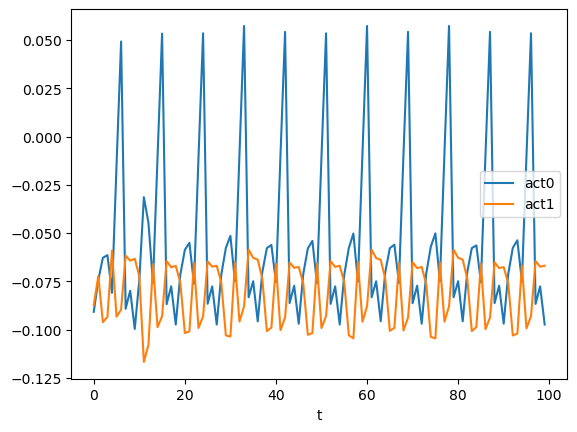

In [12]:
ppoDataDF[ppoDataDF.rep == 0].plot(x='t', y =['act0', 'act1'])